# Assignment 2(b): KNN

# Assignment 2(b): KNN

##### Let's start by loading the dataset and looking at its structure first.
##### Task1: Import the required libraries
##### Task2: Load the data set
##### Task3: Explore the first 5 rows of the data set
##### Task4: Explore the information about data set using .info()


In [17]:
import pandas as pd
import numpy as np
data = pd.read_csv("iphone_purchase_records.csv")
print(data.head())
print()
print(data.info())
print()
data2 = pd.read_csv("Tips Dataset.csv")
print(data2.head())
print()
print(data2.info())





   Gender  Age  Salary  Purchase Iphone
0    Male   19   19000                0
1    Male   35   20000                0
2  Female   26   43000                0
3  Female   27   57000                0
4    Male   19   76000                0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
None

   Unnamed: 0  person  total     cuisine    restaurant sitting_time  \
0           0       2    819  vegetarian  Restaurant_5       142min   
1           1       3   1011     chinese  Restaurant_3        54min   
2           2       6   4224       kebab  Restaurant_9       112min   
3           3       8   1142     seafood  Re

**Plot the correlation heatmap**

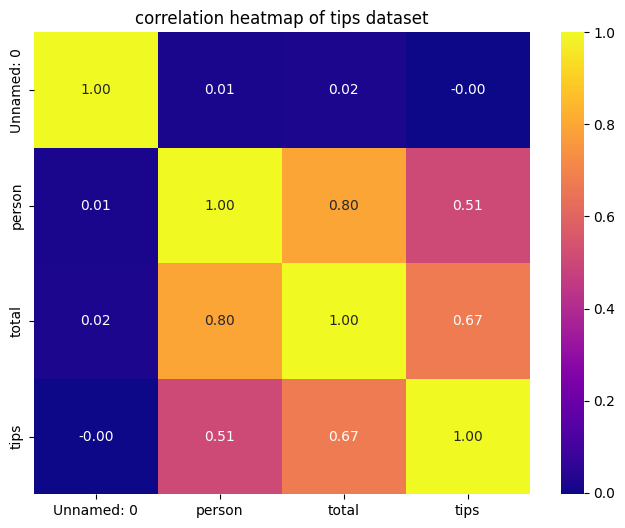

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
num_data2 = data2.select_dtypes(include=['float64', 'int64'])
corr_matrix = num_data2.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap="plasma",fmt=".2f",cbar=True)

plt.title("correlation heatmap of tips dataset")
plt.show()

**Plot the distribution keeping Salary on X axis**

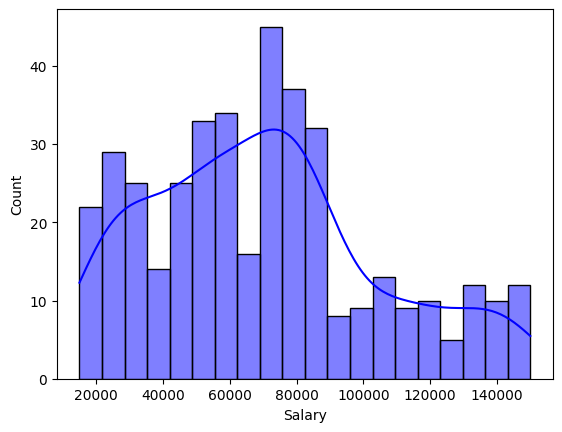

In [19]:
sns.histplot(data = data,x="Salary",kde=True,bins=20,color="blue")
plt.show()

**Plot the distribution keeping Age on X axis**

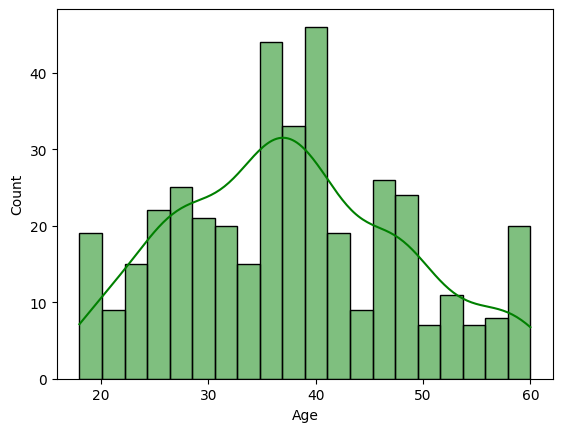

In [20]:
sns.histplot(data=data,x="Age",kde=True,bins=20,color="green")
plt.show()

**Complete the euclidean_distance function**

In [22]:
def euclidean_distance(pt1,pt2):
    pt1= np.array(pt1)
    pt2= np.array(pt2)

    return np.linalg.norm(pt1-pt2)

a=(3,9,7)
b=(2,7,1)
print(euclidean_distance(a,b))

6.4031242374328485


**Prepare the Data**

In [26]:
X = data.drop(columns=['Salary'], errors='ignore') 
y = data['Salary']

print(X.head())
print()
print(y.head())

   Gender  Age  Purchase Iphone
0    Male   19                0
1    Male   35                0
2  Female   26                0
3  Female   27                0
4    Male   19                0

0    19000
1    20000
2    43000
3    57000
4    76000
Name: Salary, dtype: int64


**Split the data, keep random state = 42**

In [27]:
#import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print( X_test.shape,  y_test.shape)

(320, 3) (320,)
(80, 3) (80,)


**Import the KNeighborsClassifier and Fit the model**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print("KNeighborsClassifier model has been trained successfully.")


KNeighborsClassifier model has been trained successfully.


**Predict the output**

In [40]:

y_pred = knn.predict(X_test)
y_pred

array([32000, 29000, 37000, 29000, 47000, 47000, 49000, 47000, 47000,
       54000, 25000, 21000, 28000, 82000, 17000, 38000, 21000, 32000,
       42000, 39000, 55000, 43000, 25000, 29000, 25000, 36000, 54000,
       52000, 39000, 26000, 23000, 25000, 99000, 20000, 65000, 38000,
       52000, 50000, 15000, 44000, 33000, 27000, 44000, 25000, 74000,
       22000, 43000, 15000, 33000, 25000, 22000, 21000, 50000, 22000,
       57000, 17000, 42000, 15000, 18000, 18000, 72000, 25000, 21000,
       37000, 20000, 17000, 79000, 49000, 71000, 51000, 21000, 25000,
       20000, 28000, 25000, 25000, 39000, 70000, 25000, 93000])

**Evaluate the model**

In [42]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.025

## Good Job!!!